In [ ]:
from typing import Tuple

import cv2
import numpy as np
from matplotlib import pyplot as plt

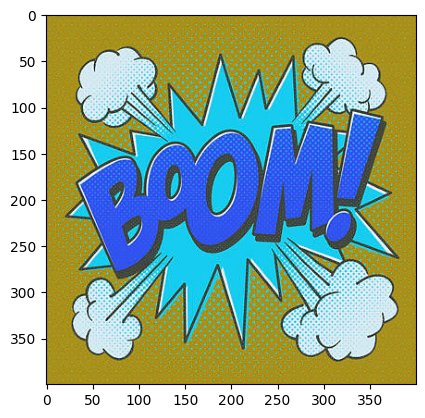

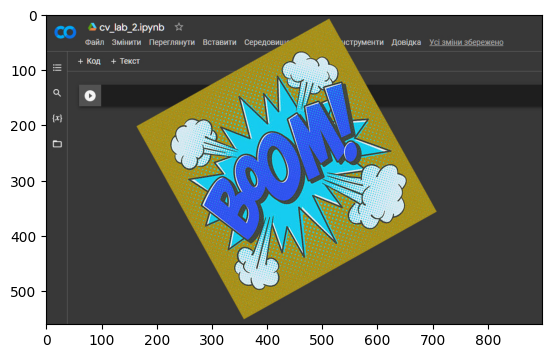

In [ ]:
# Завантажуємо зображення
img1 = cv2.imread('/boom.jpg')
img2 = cv2.imread('/boom_2.jpg')

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

Ініціалізуємо детектор і дескриптор та знаходимо особливі точки

In [ ]:
img1 = cv2.imread('/boom.jpg', 0)
img2 = cv2.imread('/boom_2.jpg', 0)
detector = cv2.ORB_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

kp1, des1 = detector.detectAndCompute(img1, None)  # keypoints, descriptors
kp2, des2 = detector.detectAndCompute(img2, None)

In [ ]:
# BRIEF algorithm
kp1, des1 = brief.compute(img1, kp1)
kp2, des2 = brief.compute(img2, kp2)

In [ ]:
# Знаходимо збіги між дескрипторами на двох зображеннях
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

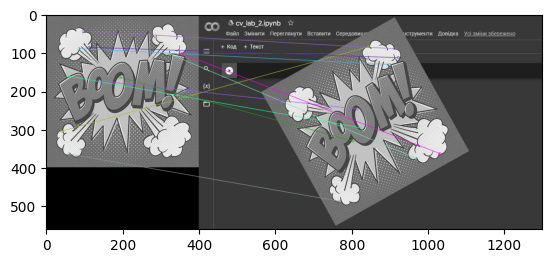

In [ ]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [ ]:
# Оцінюємо геометричні перетворення між зображеннями
src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1, 1, 2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)  # Homography matrix

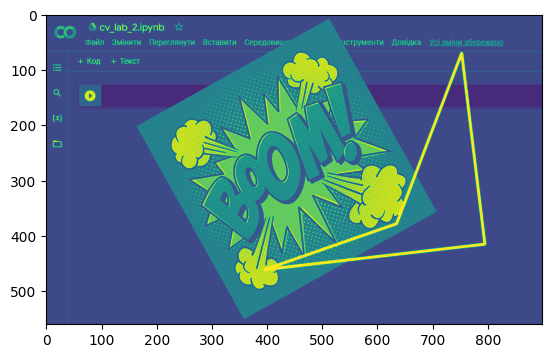

In [ ]:
# Відображаємо вихідні та перетворені точки
h, w = img1.shape
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1],[w - 1, 0] ]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, M)
img2 = cv2.polylines(img2,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)
plt.imshow(img2)
plt.show()

In [ ]:
# Отримуємо параметри геометричних перетворень
angle = np.arctan2(M[1, 0], M[0, 0]) * 180 / np.pi
print("Rotation angle: ", angle)

Rotation angle:  22.688977585475033


In [ ]:
def show_imgs(img1: np.ndarray, img2: np.ndarray) -> None:
  plt.imshow(img1)
  plt.show()

  plt.imshow(img2)
  plt.show()

def find_keypoints_and_descriptors(
    img1: np.ndarray, img2: np.ndarray,
) -> Tuple[Tuple[cv2.KeyPoint], Tuple[cv2.KeyPoint], Tuple[np.ndarray], Tuple[np.ndarray]]:
  detector = cv2.ORB_create()
  brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

  kp1, des1 = detector.detectAndCompute(img1, None)
  kp2, des2 = detector.detectAndCompute(img2, None)
  kp1, des1 = brief.compute(img1, kp1)
  kp2, des2 = brief.compute(img2, kp2)

  return kp1, kp2, des1, des2

def show_similarity(img1, img2, kp1, kp2, des1, des2) -> None:
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1, des2)
  matches = sorted(matches, key=lambda x:x.distance)

  img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:15], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.imshow(img3)
  plt.show()


def match(img1, img2) -> None:
  kp1, kp2, des1, des2 = find_keypoints_and_descriptors(img1, img2)

  show_similarity(img1, img2, kp1, kp2, des1, des2)

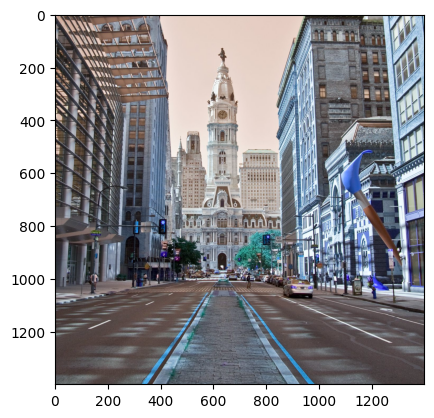

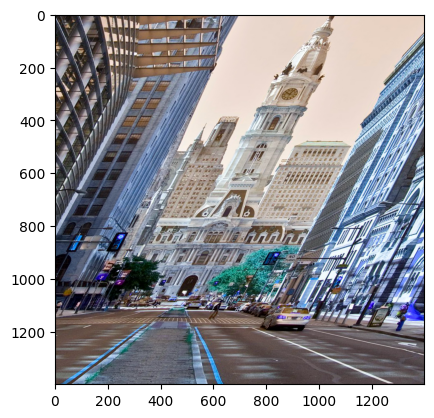

In [ ]:
img1 = cv2.imread('/city.jpg')
img2 = cv2.imread('/city_pisa.jpg')

show_imgs(img1, img2)

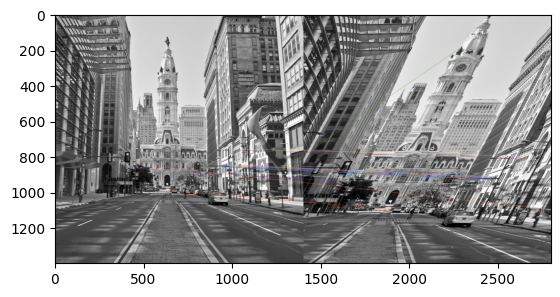

In [ ]:
img1 = cv2.imread('/city.jpg', 0)
img2 = cv2.imread('/city_pisa.jpg', 0)

match(img1, img2)

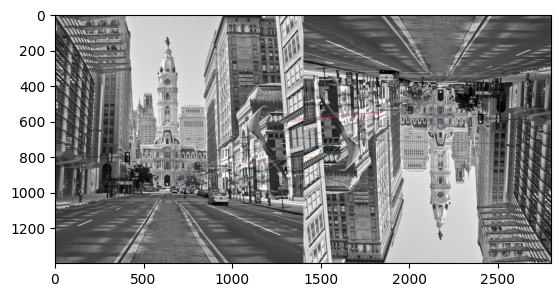

In [ ]:
img1 = cv2.imread('/city.jpg', 0)
img2 = cv2.imread('/australian_city.jpg', 0)

match(img1, img2)

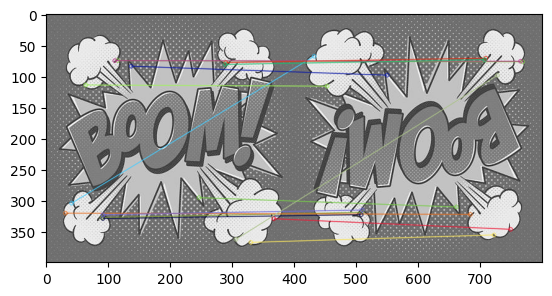

In [ ]:
img1 = cv2.imread('/boom.jpg', 0)
img2 = cv2.imread('/boom_australian.jpg', 0)

match(img1, img2)